### Changelog

- v7: running on the latest 12_4_0_pre4 version of the PR and fixig a change that was introduced in the linking of the seeds. In fact, only lower energy seeds were linked to 
  seeds in the older version of the reconstruction. Then all the links were added. In this notebook we again setup the link as the old version (only lower energy seeds)

- v6 added number of clusters in the window to understand the differences wrt of the older reconstruction version.

- v5 Loop on calo-seed but matching both the deepSC and Mustache reconstruction on the same seed. In pratice we request that a seed is the same for both the algos, as in the reco_comparison plots

- V4 the loop is on calo-seeds only: same results as expected


- V3 the calomatching has been corrected adding the cut on the 1% simFraction for the seed and the `inWindow(seed,calo)` requirement.  This should fix the tails and result in a Sim-matched resolution similar to the one observed before. --> At the end the result is not changed much

## Comparing the corrected energy on RECO output

In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = 200
import os
import numpy as np1
import pandas as pd

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
input_folder = "/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/reco_comparison/supercluster_regression/electrons"
output_folder = "/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/RecoPlots/RecoComparison_regression_UL18_v7_crosschecks_afterBugFix_latestPR"
os.makedirs(output_folder, exist_ok=True)

### Direct Object-Object comparison
Matching Object to Object on the old and new reconstruction sample

In [3]:
reco = "DeepSC_AlgoA"

In [4]:
df_1 = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco}_v6_oldsample_object.h5py", "r")["df"]
df_2 = pd.HDFStore(f"{input_folder}/ele_UL18_123X_{reco}_lowerEnSeedLinked_v7_object.h5py", "r")["df"]
df_1.rename(columns={"output_object.csv":"calomatched"}, inplace=True)
df_2.rename(columns={"output_object.csv":"calomatched"}, inplace=True)
df_1.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
df_2.rename(columns={"ncsl_tot":"ncls_tot"}, inplace=True)
df_1 = df_1.iloc[:-1]
df_2 = df_2.iloc[:-1]

df_1["Eraw_ov_Esim"] = df_1.en_sc_raw / df_1.calo_en_sim
df_1["Ecorr_ov_Esim"] = df_1.en_sc_calib / df_1.calo_en_sim
df_2["Eraw_ov_Esim"] = df_2.en_sc_raw / df_2.calo_en_sim
df_2["Ecorr_ov_Esim"] = df_2.en_sc_calib / df_2.calo_en_sim

df_1["Eraw_ov_EGen"] = df_1.en_sc_raw / df_1.genpart_en
df_1["Ecorr_ov_EGen"] = df_1.en_sc_calib / df_1.genpart_en
df_2["Eraw_ov_EGen"] = df_2.en_sc_raw / df_2.genpart_en
df_2["Ecorr_ov_EGen"] = df_2.en_sc_calib / df_2.genpart_en

df_1.rename(columns={"sc_index": "old_index"}, inplace=True)
df_2.rename(columns={"sc_index": "new_index"}, inplace=True)


df_join = df_1.merge(df_2, on=["runId","eventId","caloindex"], suffixes=["_old", "_new"],indicator=True)

In [5]:
df_join._merge.unique()

['both']
Categories (1, object): ['both']

In [6]:
df_join.columns

Index(['calomatched_old', 'caloindex', 'genmatched_old', 'genindex_old',
       'old_index', 'seed_index_old', 'en_seed_old', 'et_seed_old',
       'en_seed_calib_old', 'et_seed_calib_old', 'seed_eta_old',
       'seed_phi_old', 'seed_iz_old', 'ncls_sel_old', 'ncls_sel_true_old',
       'ncls_sel_false_old', 'ncls_true_old', 'ncls_tot_old',
       'ncls_missing_old', 'en_sc_raw_old', 'et_sc_raw_old', 'en_sc_calib_old',
       'et_sc_calib_old', 'calo_en_gen_old', 'calo_et_gen_old',
       'calo_en_sim_old', 'calo_et_sim_old', 'calo_geneta_old',
       'calo_genphi_old', 'calo_simeta_old', 'calo_simphi_old',
       'calo_genpt_old', 'genpart_en_old', 'genpart_et_old', 'gen_eta_old',
       'gen_phi_old', 'gen_pt_old', 'nVtx_old', 'rho_old', 'obsPU_old',
       'truePU_old', 'eventId', 'runId', 'Eraw_ov_Esim_old',
       'Ecorr_ov_Esim_old', 'Eraw_ov_EGen_old', 'Ecorr_ov_EGen_old',
       'calomatched_new', 'genmatched_new', 'genindex_new', 'new_index',
       'seed_index_new', 'en_seed_

Text(0, 1, 'new index')

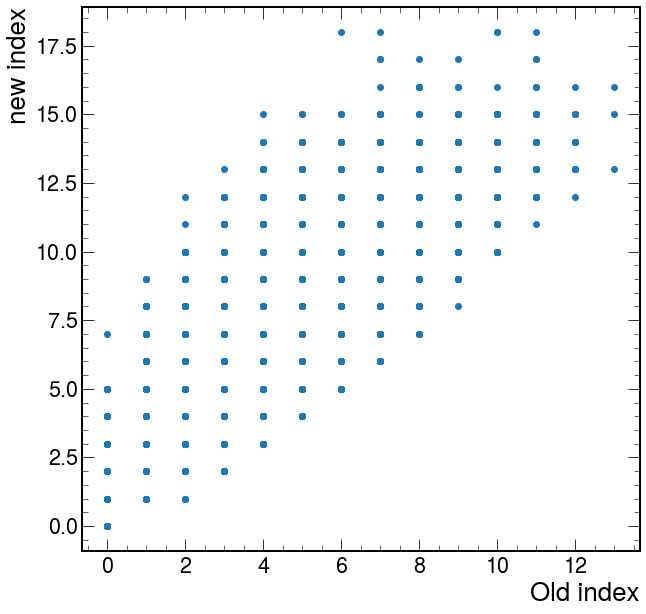

In [7]:
plt.scatter(df_join.old_index, df_join.new_index)
plt.xlabel("Old index")
plt.ylabel("new index")

Text(0, 1, 'New Seed eta')

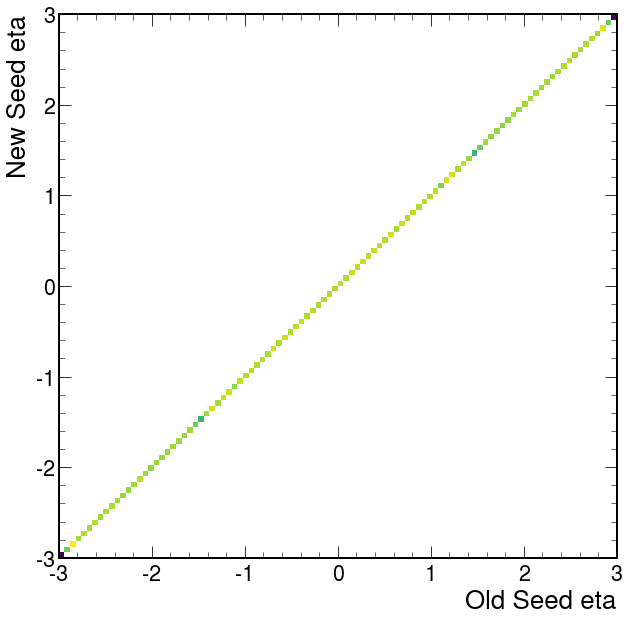

In [8]:
plt.hist2d(df_join.seed_eta_old, df_join.seed_eta_new, range=((-3,3),(-3,3)), 
           bins=(100,100), cmin=1)
plt.xlabel("Old Seed eta")
plt.ylabel("New Seed eta")

Text(0, 1, 'New Et SC Raw')

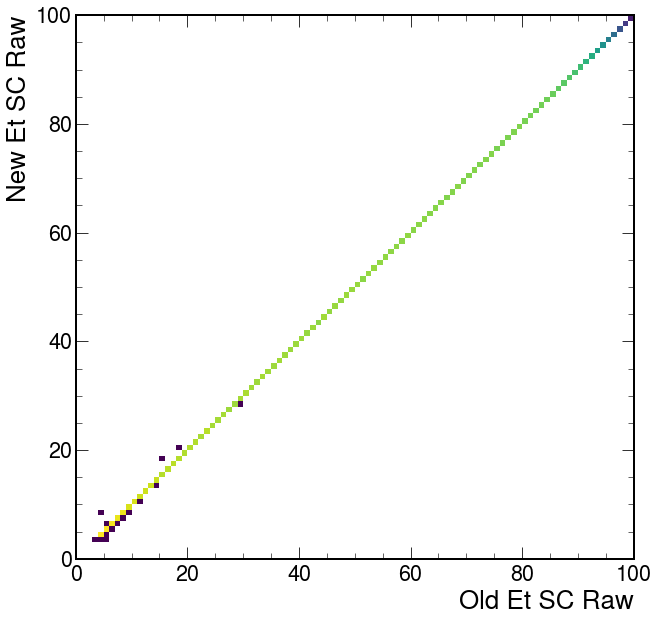

In [9]:
plt.hist2d(df_join.et_sc_raw_old, df_join.et_sc_raw_new, range=((0,100),(0,100)), 
           bins=(100,100), cmin=1)
plt.xlabel("Old Et SC Raw")
plt.ylabel("New Et SC Raw")

/tmp/ipykernel_516/4029479166.py:10: RuntimeWarning: invalid value encountered in true_divide
  a = A/s


Text(0.1, 0.75, 'Inclusive')

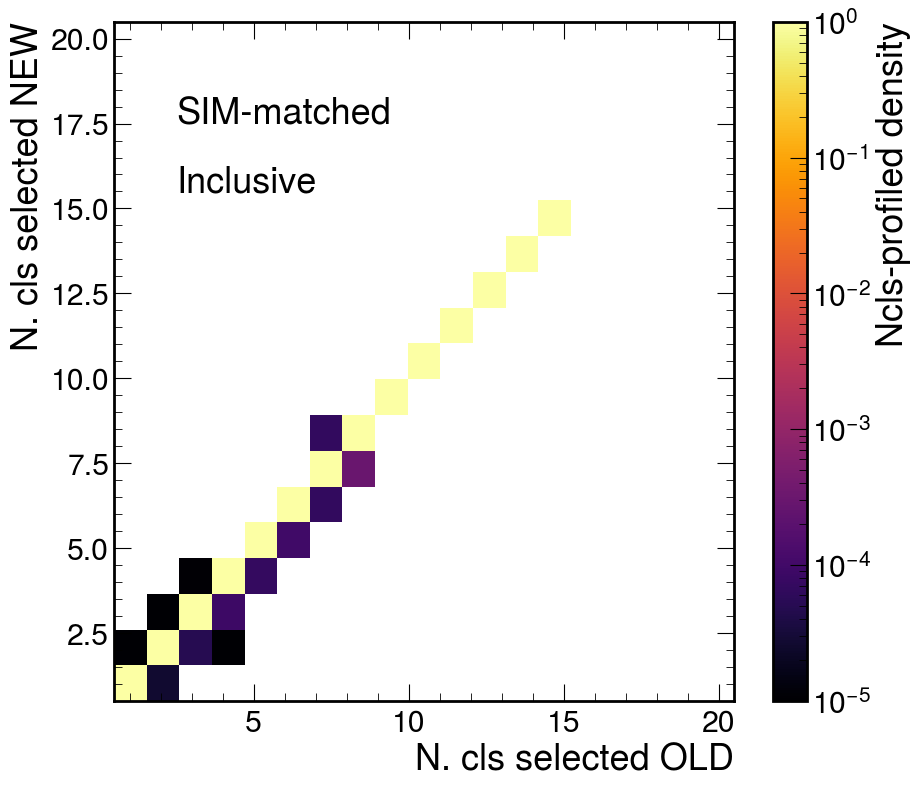

In [10]:
xbins = np.linspace(0.5,20.5,20)
ybins = np.linspace(0.5,20.5,20)

df = df_join

fig, ax = plt.subplots(1,1, figsize=(10,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df.ncls_sel_old, df.ncls_sel_new , bins=(xbins, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

fig.colorbar(I, ax=ax, label="Ncls-profiled density")
ax.set_ylabel("N. cls selected NEW")
ax.set_xlabel("N. cls selected OLD")
ax.text(0.1, 0.85, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.75, "Inclusive", transform=ax.transAxes)



Text(0, 1, 'New Ncls missing')

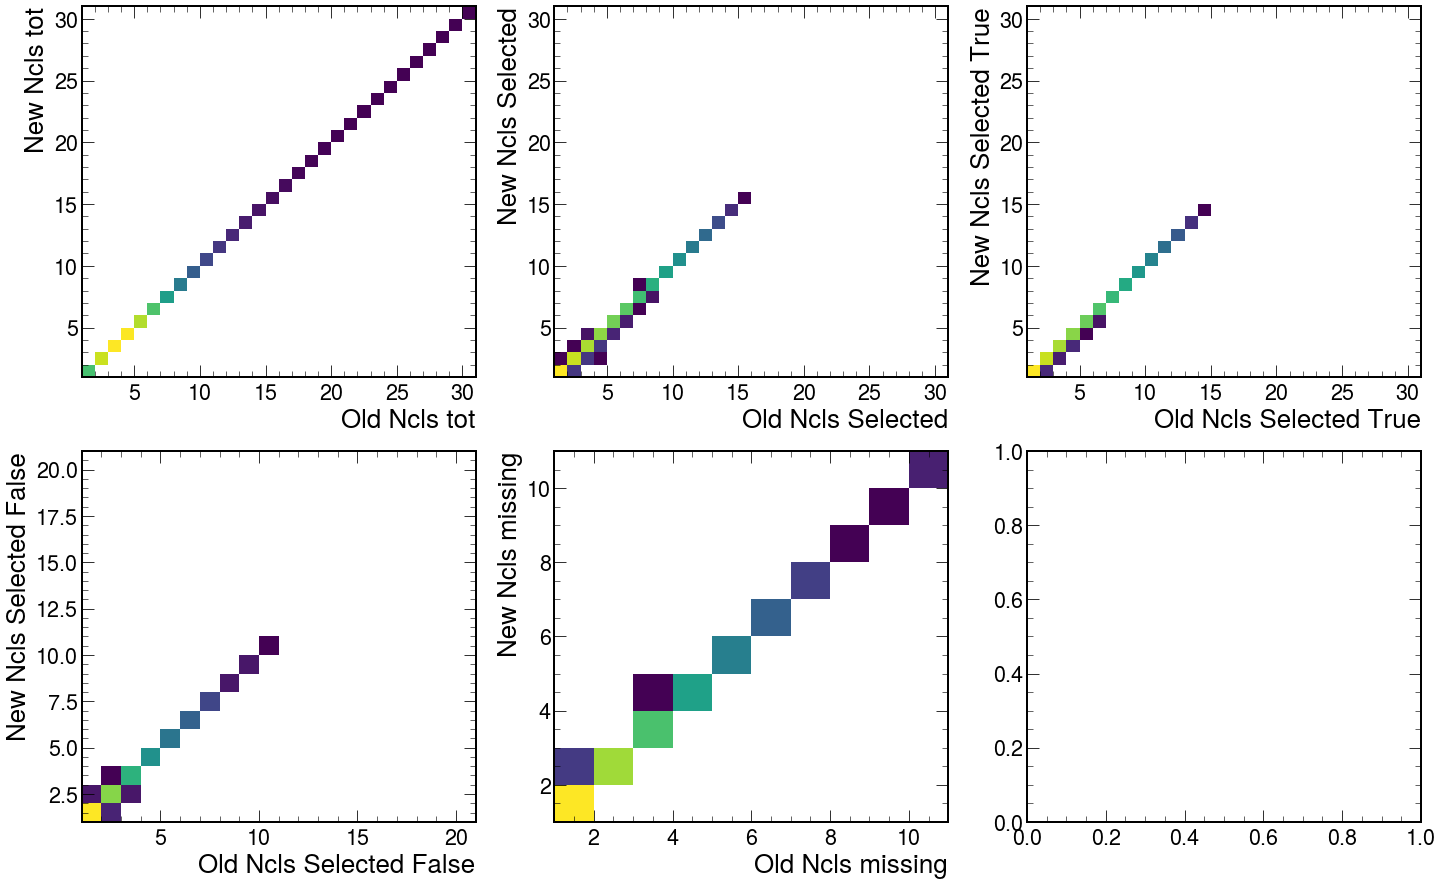

In [11]:
f, axs = plt.subplots(2, 3, figsize=(24, 15))

axs[0][0].hist2d(df_join.ncls_tot_old, df_join.ncls_tot_new, range=((1,31),(1,31)), 
           bins=(30,30), cmin=1)
axs[0][0].set_xlabel("Old Ncls tot")
axs[0][0].set_ylabel("New Ncls tot")

axs[0][1].hist2d(df_join.ncls_sel_old, df_join.ncls_sel_new, range=((1,31),(1,31)), 
           bins=(30,30), cmin=1, norm=colors.LogNorm())
axs[0][1].set_xlabel("Old Ncls Selected")
axs[0][1].set_ylabel("New Ncls Selected")

axs[0][2].hist2d(df_join.ncls_sel_true_old, df_join.ncls_sel_true_new, range=((1,31),(1,31)), 
           bins=(30,30), cmin=1, norm=colors.LogNorm())
axs[0][2].set_xlabel("Old Ncls Selected True")
axs[0][2].set_ylabel("New Ncls Selected True")

axs[1][0].hist2d(df_join.ncls_sel_false_old, df_join.ncls_sel_false_new, range=((1,21),(1,21)), 
           bins=(20,20), cmin=1,norm=colors.LogNorm())
axs[1][0].set_xlabel("Old Ncls Selected False")
axs[1][0].set_ylabel("New Ncls Selected False")

axs[1][1].hist2d(df_join.ncls_missing_old, df_join.ncls_missing_new, range=((1,11),(1,11)), 
           bins=(10,10), cmin=1,norm=colors.LogNorm())
axs[1][1].set_xlabel("Old Ncls missing")
axs[1][1].set_ylabel("New Ncls missing")

### Comparing the two reconstructions

Text(0.1, 0.05, 'Inclusive')

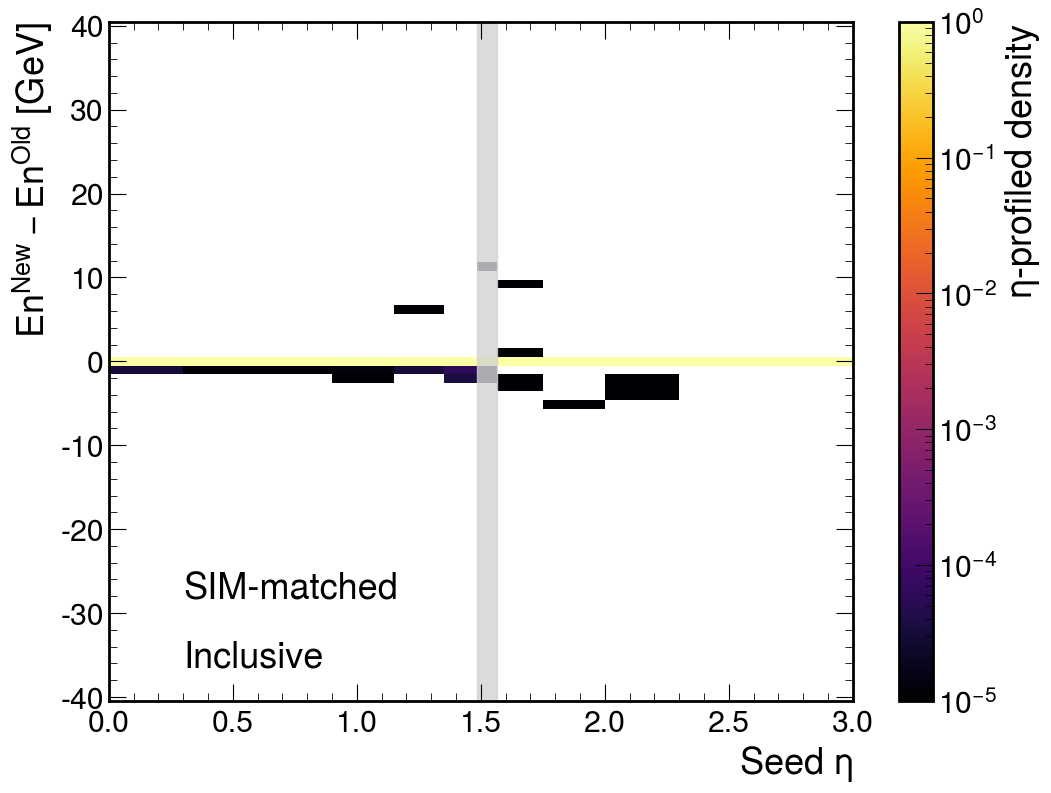

In [12]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
xbins = np.linspace(-40.5,40.5,80)

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df.seed_eta_old.abs(), df.en_sc_raw_new - df.en_sc_raw_old, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{New} - En^{Old}$ [GeV]")
ax.set_xlabel("Seed $\eta$")
ax.text(0.1, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.05, "Inclusive", transform=ax.transAxes)



Text(0.5, 0.05, 'Inclusive')

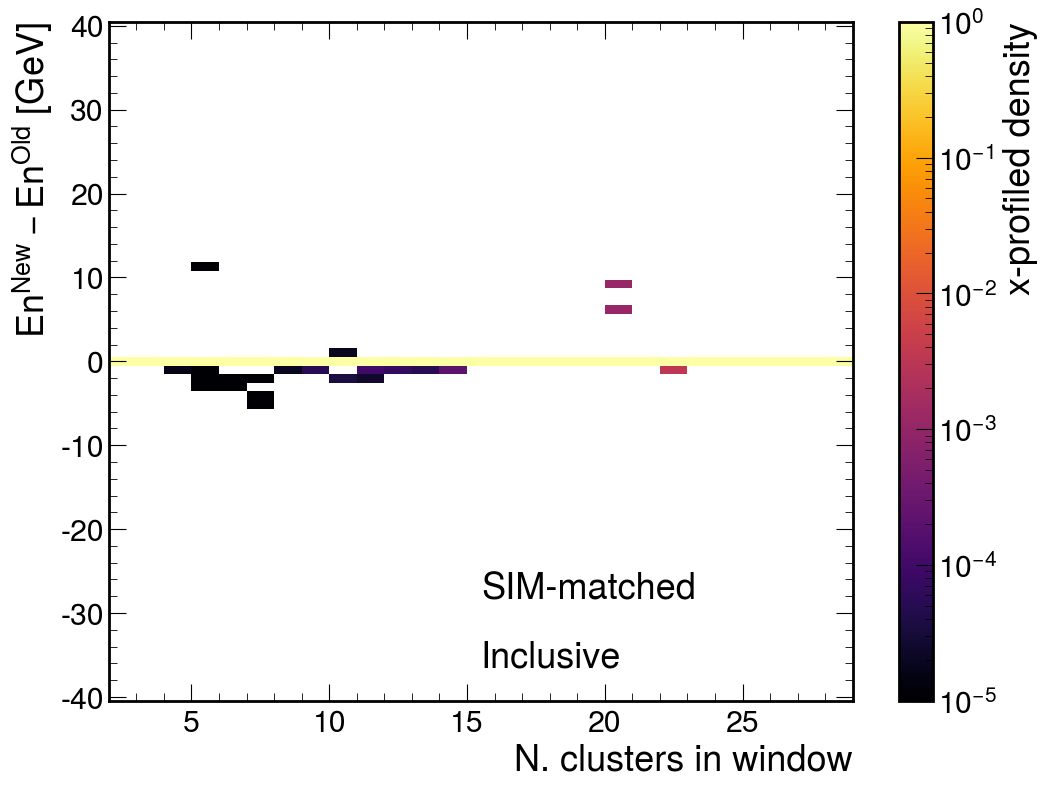

In [13]:
etas =  np.arange(2, 30)
xbins = np.linspace(-40.5,40.5,80)

df = df_join
fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df.ncls_tot_old, df.en_sc_raw_new - df.en_sc_raw_old, bins=(etas, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$En^{New} - En^{Old}$ [GeV]")
ax.set_xlabel("N. clusters in window")
ax.text(0.5, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.5, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.1, 0.05, 'Inclusive')

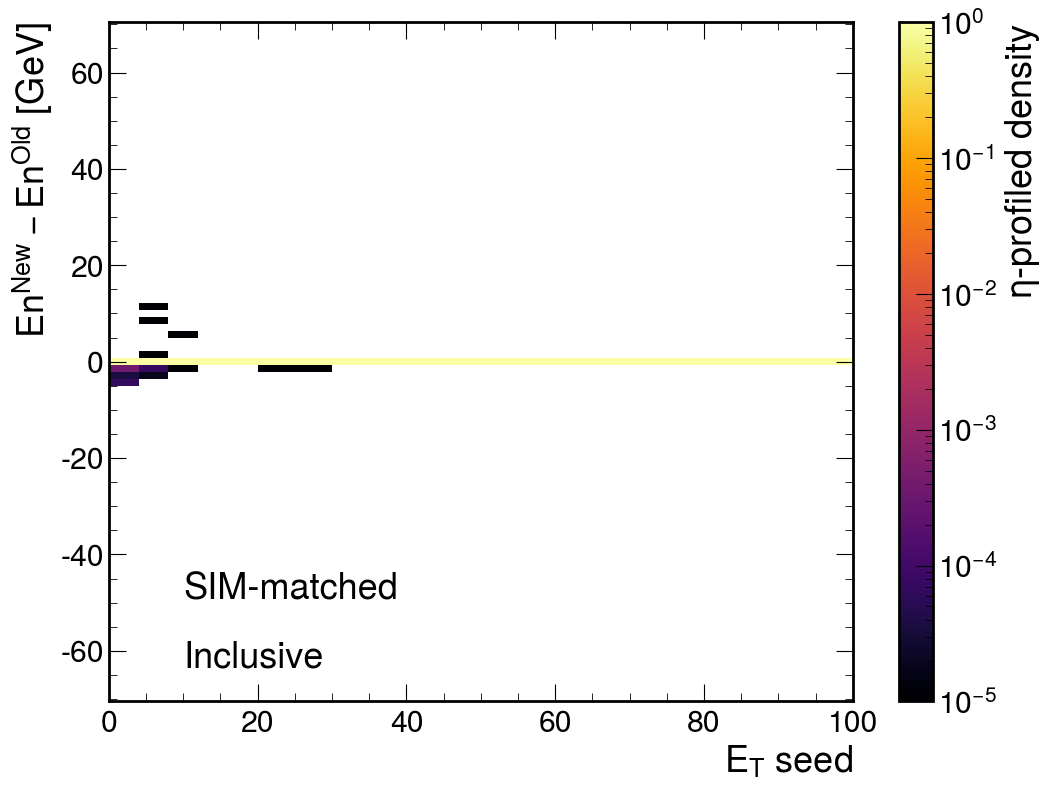

In [14]:
ets =  [0,4,8,12,16,20,30,40,50,60,70,100]
xbins = np.linspace(-70.5,70.5,100)

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df.et_seed_old, df.en_sc_raw_new - df.en_sc_raw_old, bins=(ets, xbins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$En^{New} - En^{Old}$ [GeV]")
ax.set_xlabel("$E_T$ seed")
ax.text(0.1, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.68, 0.05, 'Inclusive')

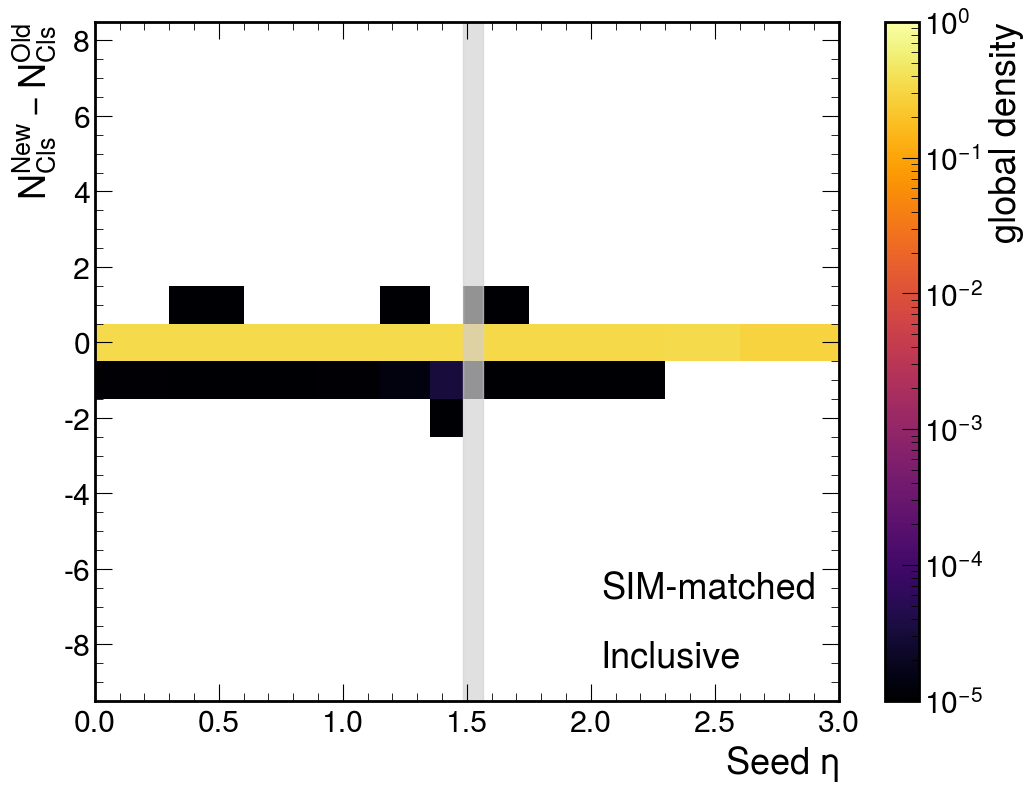

In [15]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
A,xedges,yedges  = np.histogram2d(df.seed_eta_new.abs(), df.ncls_sel_new - df.ncls_sel_old, bins=(etas, ybins ), density=True)
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, A.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [ybins[0], ybins[0]],[ybins[-1],ybins[-1]], color="lightgray", alpha=0.7)

fig.colorbar(I, ax=ax, label="global density")   
ax.set_ylabel("$N_{Cls}^{New} -N_{Cls}^{Old}$")
ax.set_xlabel("Seed $\eta$")
ax.text(0.68, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.68, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.68, 0.05, 'Inclusive')

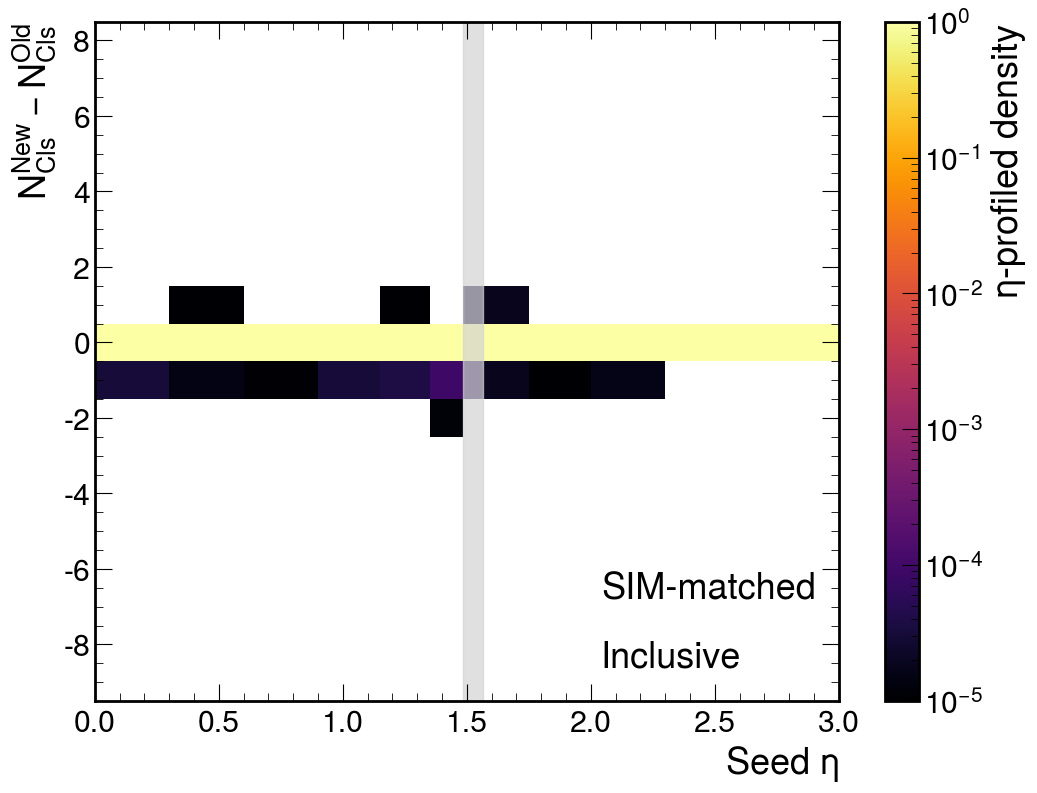

In [16]:
etas =  [0, 0.3,0.6, 0.9, 1.15, 1.35, 1.485, 1.566, 1.75,2.,2.3,2.6,3]
ybins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)
A,xedges,yedges  = np.histogram2d(df.seed_eta_new.abs(), df.ncls_sel_new - df.ncls_sel_old, bins=(etas, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

ax.fill_between([1.485, 1.566], [ybins[0], ybins[0]],[ybins[-1],ybins[-1]], color="lightgray", alpha=0.7)

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$N_{Cls}^{New} -N_{Cls}^{Old}$")
ax.set_xlabel("Seed $\eta$")
ax.text(0.68, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.68, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.1, 0.05, 'Inclusive')

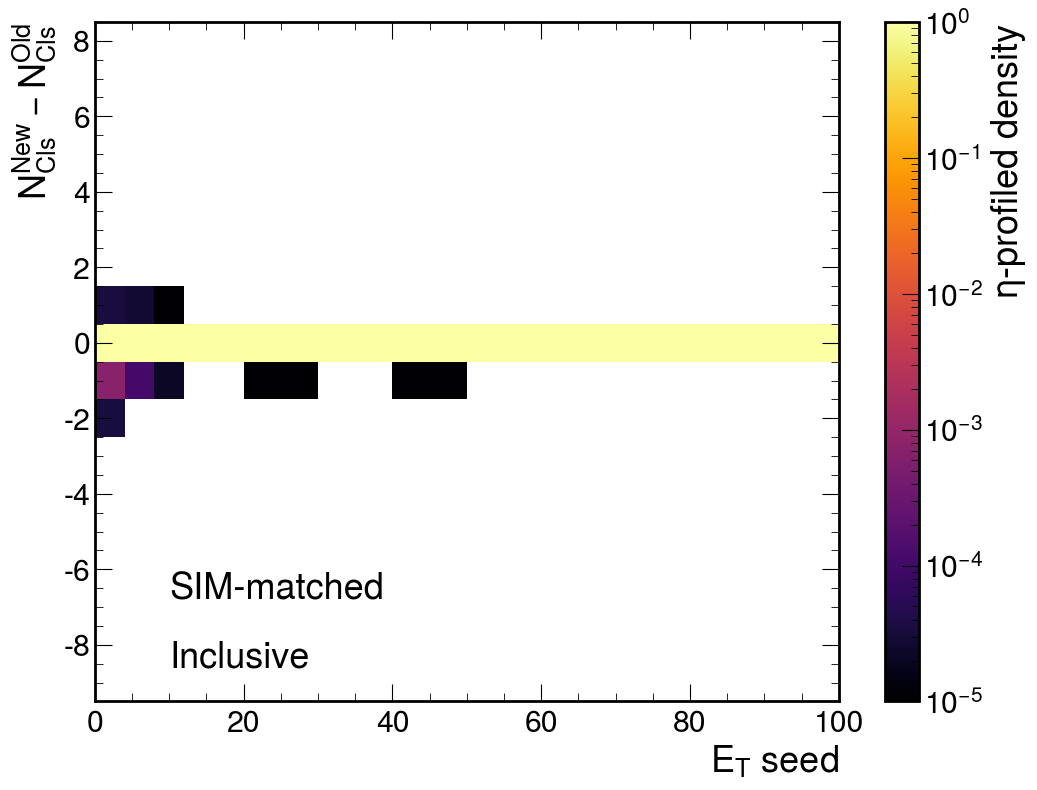

In [17]:
ets =  [0,4,8,12,16,20,30,40,50,60,70,100]
ybins = [-9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df.et_seed_old,df.ncls_sel_new - df.ncls_sel_old, bins=(ets, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

fig.colorbar(I, ax=ax, label="$\eta$-profiled density")   
ax.set_ylabel("$N_{Cls}^{New} -N_{Cls}^{Old}$")
ax.set_xlabel("$E_T$ seed")
ax.text(0.1, 0.15, "SIM-matched", transform=ax.transAxes)
ax.text(0.1, 0.05, "Inclusive", transform=ax.transAxes)


Text(0.52, 0.85, 'Inclusive')

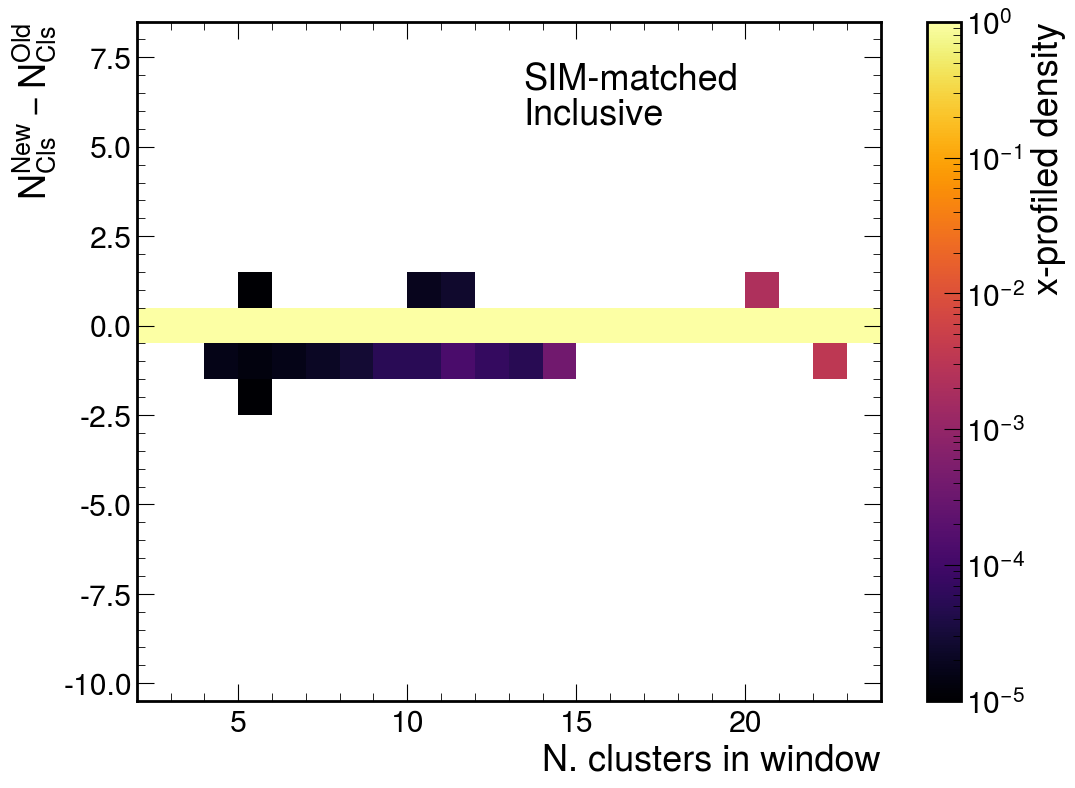

In [18]:
ybins =  [-10.5, -9.5,-8.5, -7.5, -6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5, 1.5 ,2.5 ,3.5, 4.5 ,5.5,6.5,7.5,8.5]
xbins = np.arange(2,25,)

df = df_join

fig, ax = plt.subplots(1,1, figsize=(12,9),dpi=100)

A,xedges,yedges  = np.histogram2d(df.ncls_tot_old, df.ncls_sel_new - df.ncls_sel_old, bins=(xbins, ybins ))
s = np.expand_dims(np.sum(A, axis=-1), axis=1)
a = A/s
X, Y = np.meshgrid(xedges, yedges)
I = ax.pcolormesh(X, Y, a.T, norm=colors.LogNorm(vmax=1, vmin=1e-5), cmap="inferno")

#ax.fill_between([1.485, 1.566], [-40.5,-40.5],[40.5,40.5], color="lightgray", alpha=0.8)

fig.colorbar(I, ax=ax, label="x-profiled density")   
ax.set_ylabel("$N_{Cls}^{New} -N_{Cls}^{Old}$")
ax.set_xlabel("N. clusters in window")
ax.text(0.52, 0.9, "SIM-matched", transform=ax.transAxes)
ax.text(0.52, 0.85, "Inclusive", transform=ax.transAxes)


# Energy resolution analysis

In [19]:
def bin_analysis(col):
    def f(df):
        m = df[col].mean()
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.975) - df[col].quantile(0.025))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

def bin_analysis_details(col):
    def f(df):
        m = df[col].mean()
        qu = df[col].quantile(0.84)
        qd = df[col].quantile(0.16)
        A = (qu - qd)/2
        quu = df[col].quantile(0.975)
        qdd = df[col].quantile(0.025)
        B = (quu- qdd )/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "w68_u": qu,
            "w68_d": qd,
            "w95_u" : quu,
            "w95_d" : qdd,
            "N": df[col].count()
        })
    return f


def get_quantiles(df):
    return df.quantile(0.025), df.quantile(0.16), df.quantile(0.5), df.quantile(0.84), df.quantile(0.975)



def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

from numba import jit

#@jit(nopython=True)
def get_central_smallest_interval(df, xrange, nbins, Ntrial=10000):
    H = np.histogram(df, bins=nbins, range=xrange)
    
    #xx = movingaverage(H[0], 10)
    
    xmax = H[1][np.argmax(H[0])]
    
    #xmax = np.mean(df[(df>=xrange[0]) & (df<xrange[1])])
    deltax = (xrange[1]-xrange[0])/(2*Ntrial)
    
    N = df.size
    xd = xmax-deltax
    xu = xmax+deltax
    for i in range(Ntrial):
        q = np.sum((df>xd) &(df<xu))/ N
        if q>=0.68: 
            break
        xd = xd-deltax
        xu = xu+deltax
    return xmax, xd, xu

def bin_analysis_central_smallest(col, xrange=(0.6, 1.2), nbins=200, Ntrial =10000):
    def f(df):
        data = df[col]
        xmax, qd, qu = get_central_smallest_interval(data.values, xrange=xrange, nbins=nbins, Ntrial =Ntrial )
        return pd.Series({
            "m": xmax,
            "w68": (qu-qd)/2,
            "w68_u": qu,
            "w68_d": qd,
            "N": df[col].count()
        })
    return f

### Inclusive plots

Text(1, 0, 'ET raw/Gen')

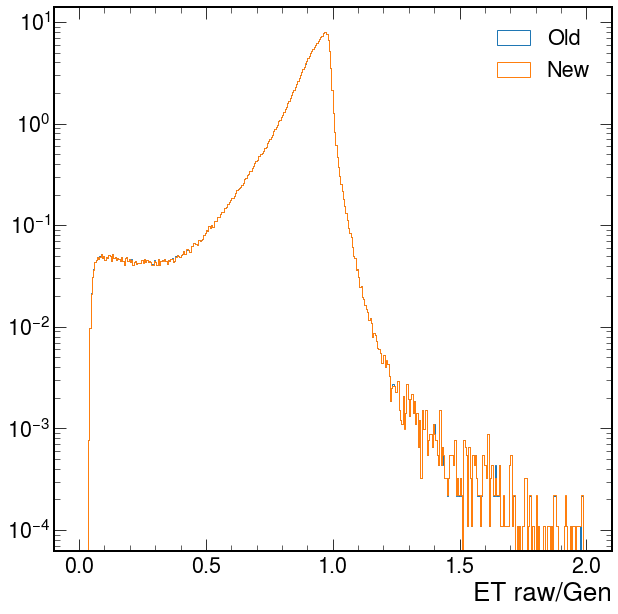

In [20]:
plt.hist(df_join.Eraw_ov_EGen_old, bins=400, range=(0,2), label="Old", histtype="step", density=True)
plt.hist(df_join.Eraw_ov_EGen_new, bins=400, range=(0,2), label="New", histtype="step", density=True)
plt.legend()
plt.yscale("log")
plt.xlabel("ET raw/Gen")

Text(1, 0, 'ET raw/Gen')

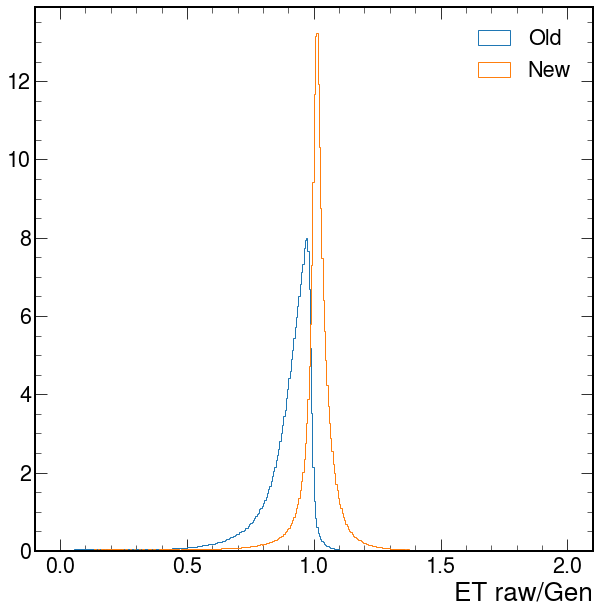

In [21]:
plt.hist(df_join.Ecorr_ov_EGen_old, bins=400, range=(0,2), label="Old", histtype="step", density=True)
plt.hist(df_join.Ecorr_ov_EGen_new, bins=400, range=(0,2), label="New", histtype="step", density=True)
plt.legend()
#plt.yscale("log")
plt.xlabel("ET raw/Gen")

### Checks on collected energies

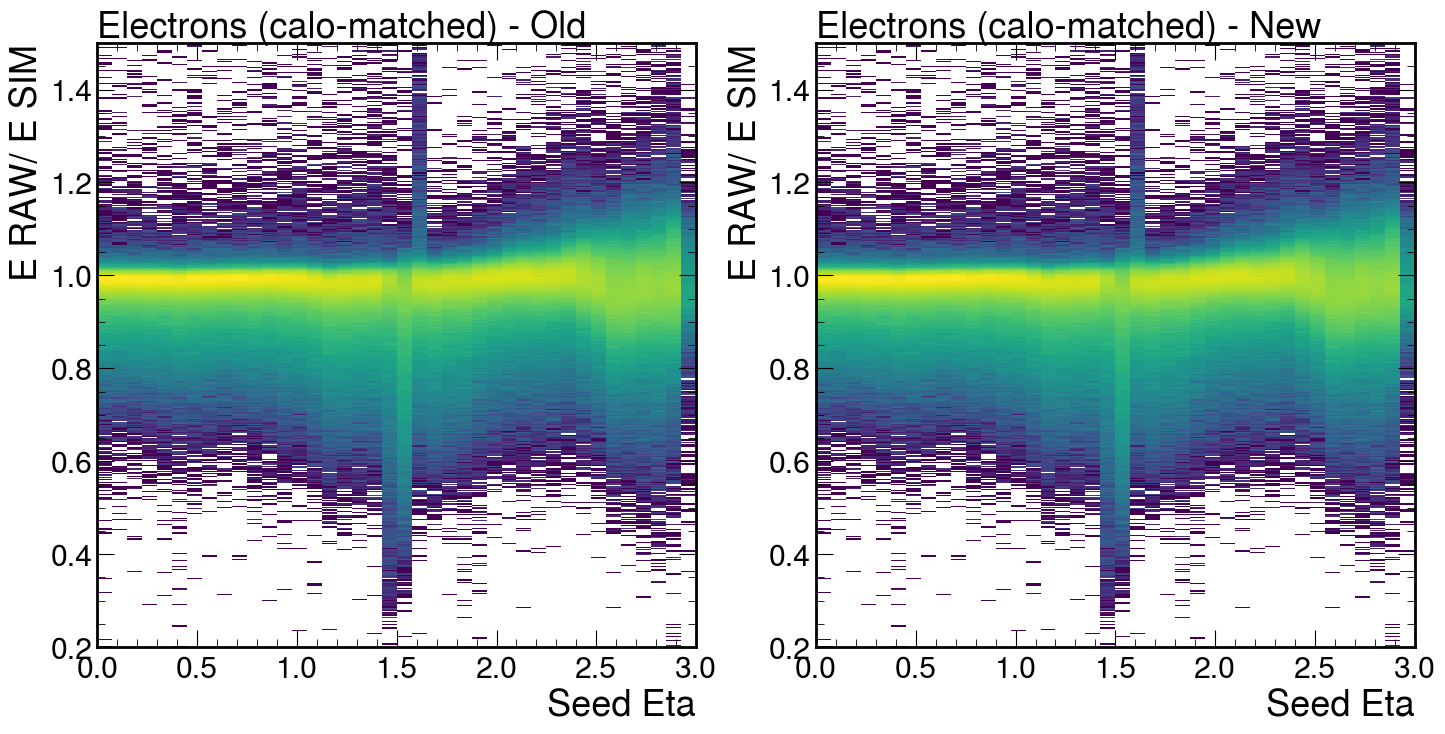

In [22]:
flavour = "Electrons (calo-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (suf,label) in enumerate(zip(["_old","_new"],["Old", "New"])):
    
    ax[i].hist2d(df_join[f"seed_eta{suf}"].abs(),df_join[f"Eraw_ov_Esim{suf}"], bins=(40,500), range=((0,3),(0.2,1.5)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Eta")
    ax[i].set_ylabel("E RAW/ E SIM")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


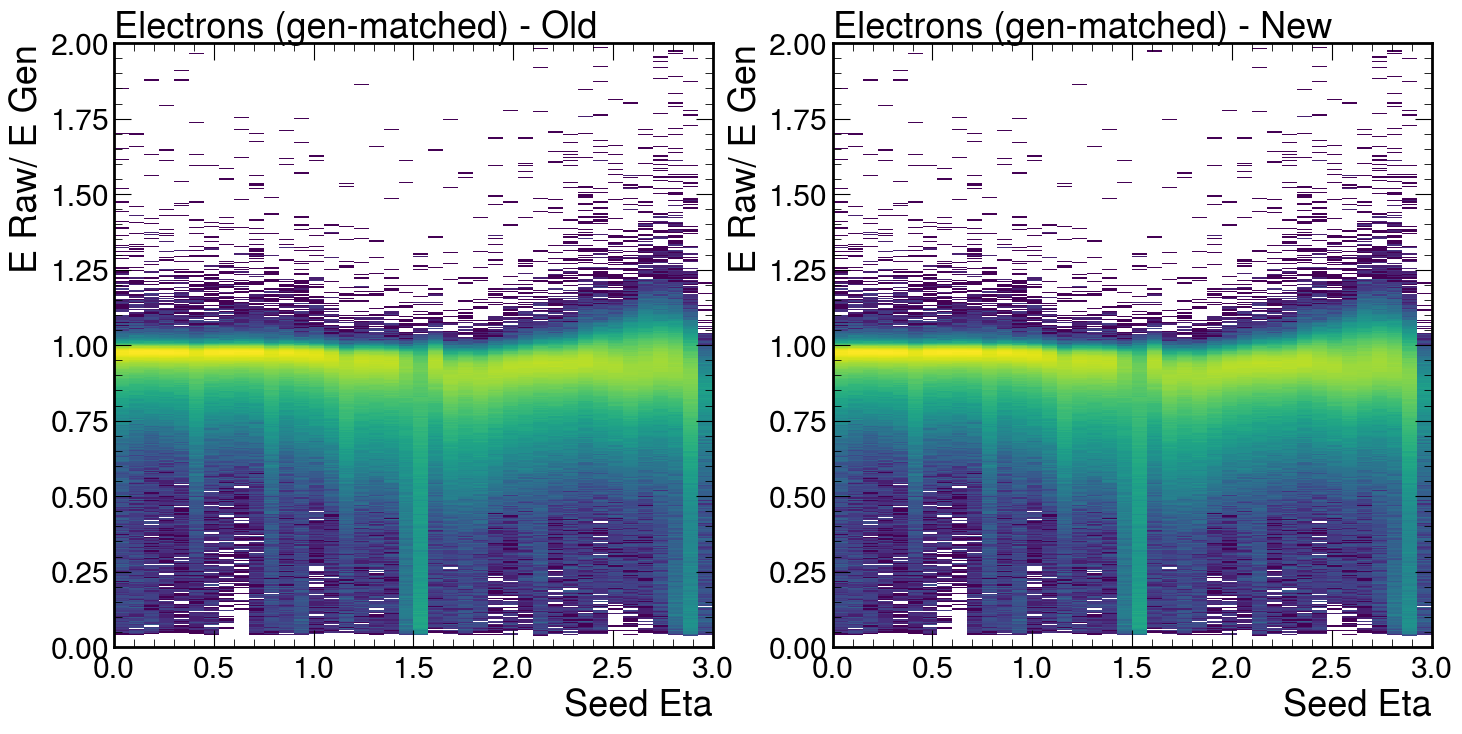

In [23]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (suf,label) in enumerate(zip(["_old","_new"],["Old", "New"])):
    
    ax[i].hist2d(df_join[f"seed_eta{suf}"].abs(),df_join[f"Eraw_ov_EGen{suf}"], bins=(40,500), range=((0,3),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Eta")
    ax[i].set_ylabel("E Raw/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


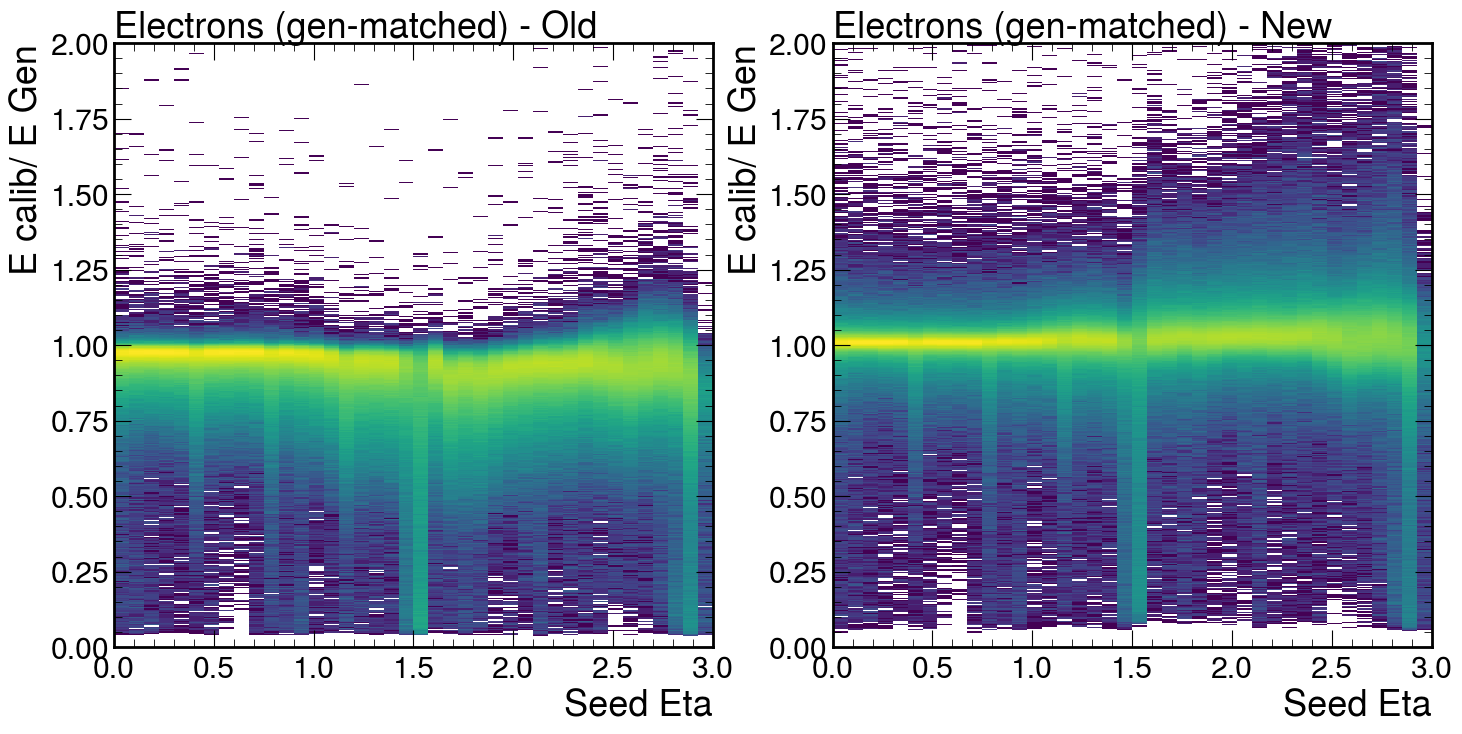

In [24]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)
?
for i, (suf,label) in enumerate(zip(["_old","_new"],["Old", "New"])):
    
    ax[i].hist2d(df_join[f"seed_eta{suf}"].abs(),df_join[f"Ecorr_ov_EGen{suf}"], bins=(40,500), range=((0,3),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Eta")
    ax[i].set_ylabel("E calib/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


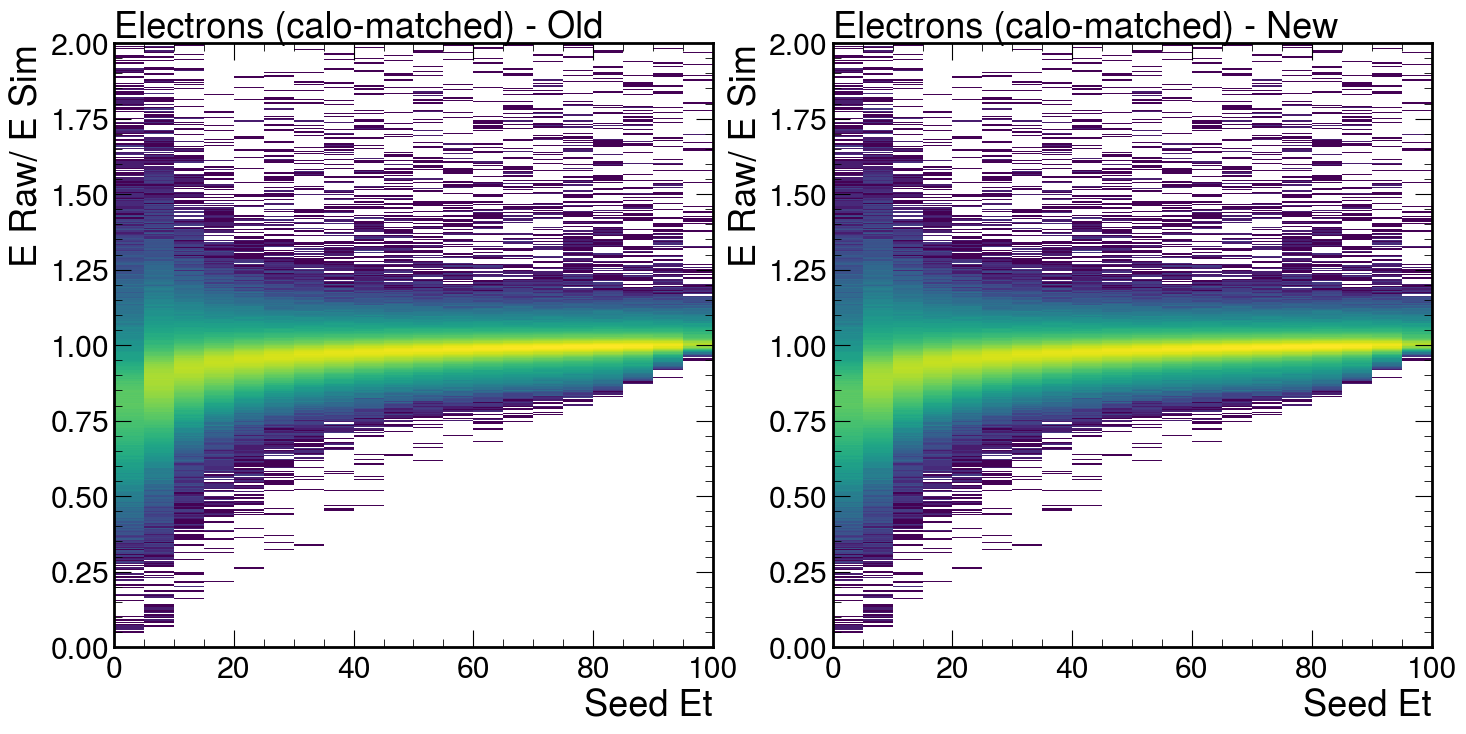

In [25]:
flavour = "Electrons (calo-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (suf,label) in enumerate(zip(["_old","_new"],["Old", "New"])):
    
    ax[i].hist2d(df_join[f"et_seed{suf}"].abs(),df_join[f"Eraw_ov_Esim{suf}"], bins=(20,500), range=((0,100),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Et")
    ax[i].set_ylabel("E Raw/ E Sim")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


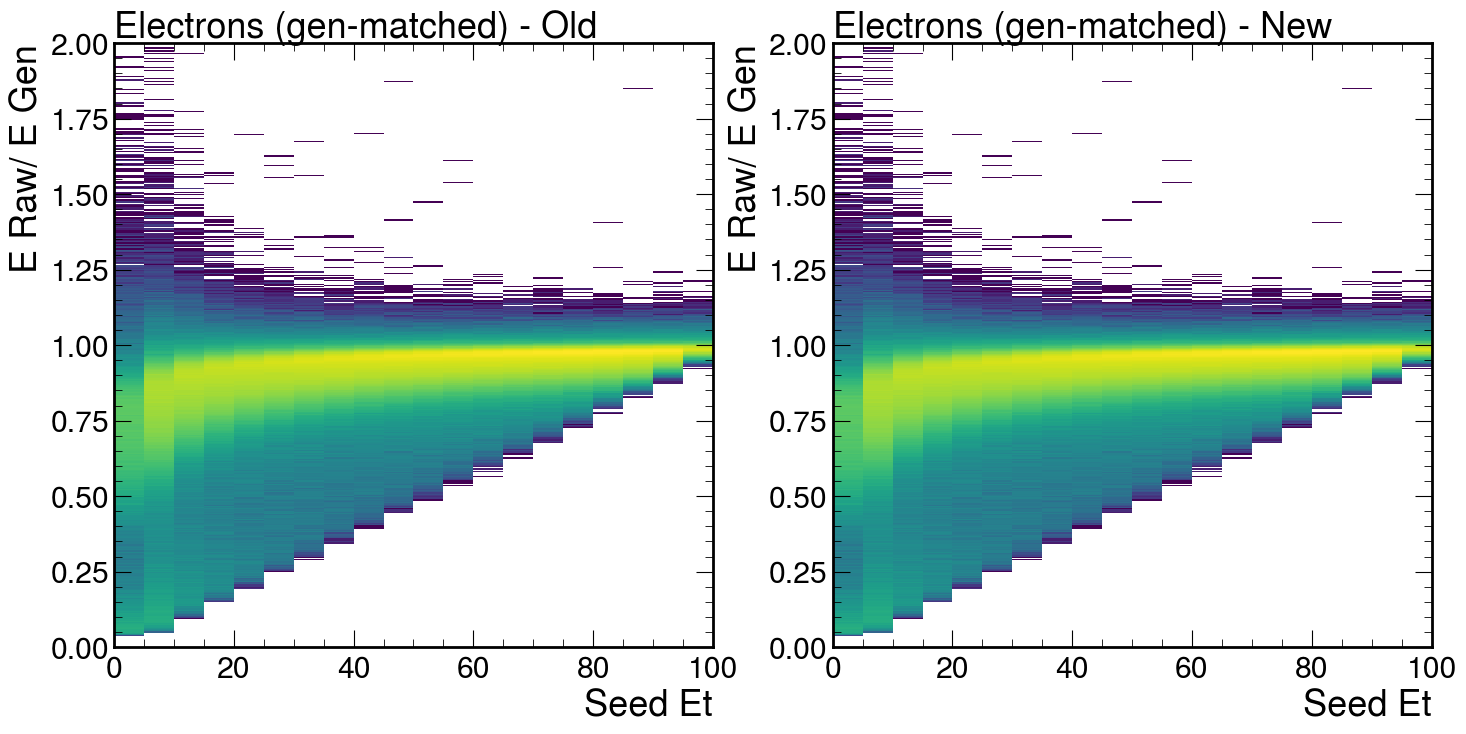

In [26]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (suf,label) in enumerate(zip(["_old","_new"],["Old", "New"])):
    
    ax[i].hist2d(df_join[f"et_seed{suf}"].abs(),df_join[f"Eraw_ov_EGen{suf}"], bins=(20,500), range=((0,100),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Et")
    ax[i].set_ylabel("E Raw/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


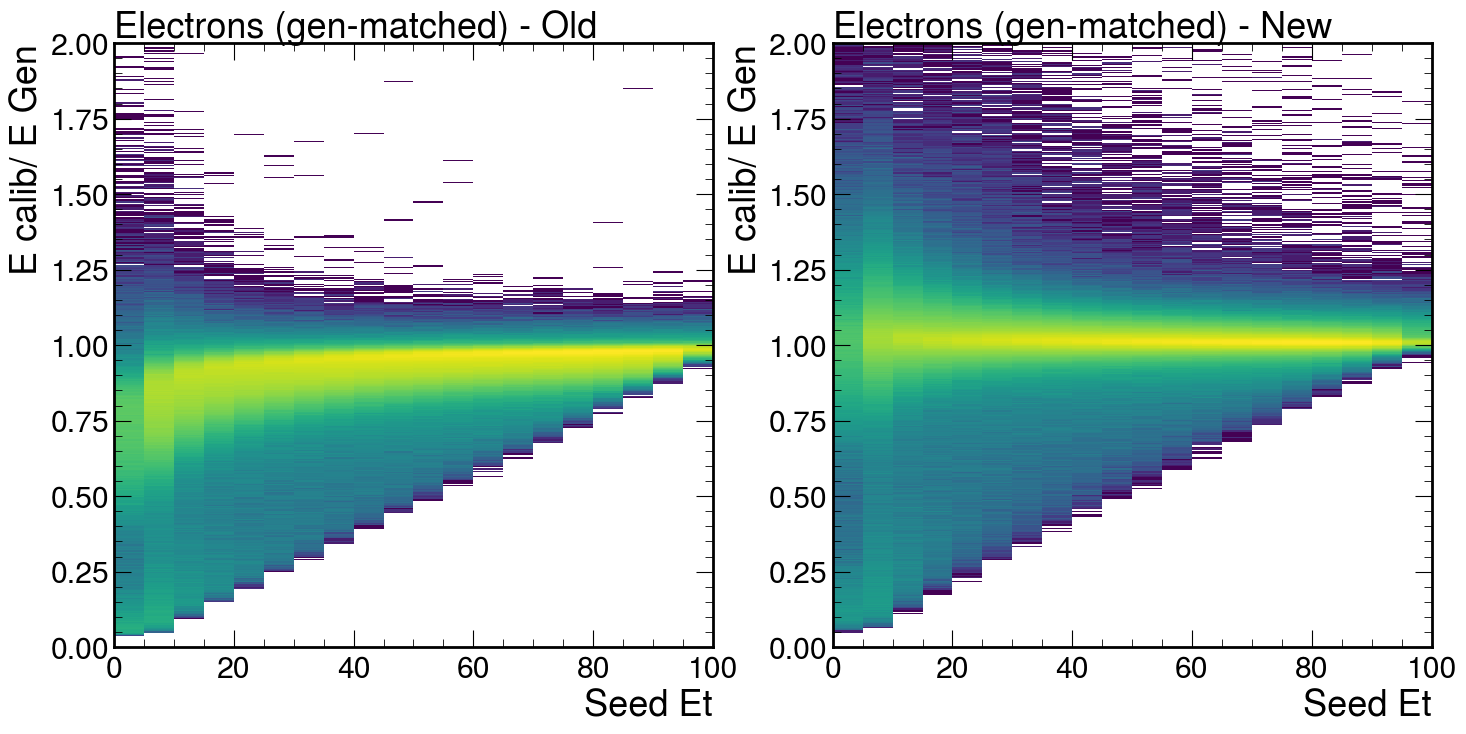

In [27]:
flavour = "Electrons (gen-matched)"

fig, ax= plt.subplots(1,2, figsize=(17,8), dpi=100)

for i, (suf,label) in enumerate(zip(["_old","_new"],["Old", "New"])):
    
    ax[i].hist2d(df_join[f"et_seed{suf}"].abs(),df_join[f"Ecorr_ov_EGen{suf}"], bins=(20,500), range=((0,100),(0,2)), 
                 density=True, norm=colors.LogNorm())
    ax[i].set_xlabel("Seed Et")
    ax[i].set_ylabel("E calib/ E Gen")
    ax[i].text(0., 1.01, flavour+ " - "+label, transform=ax[i].transAxes)


## Resolution plots

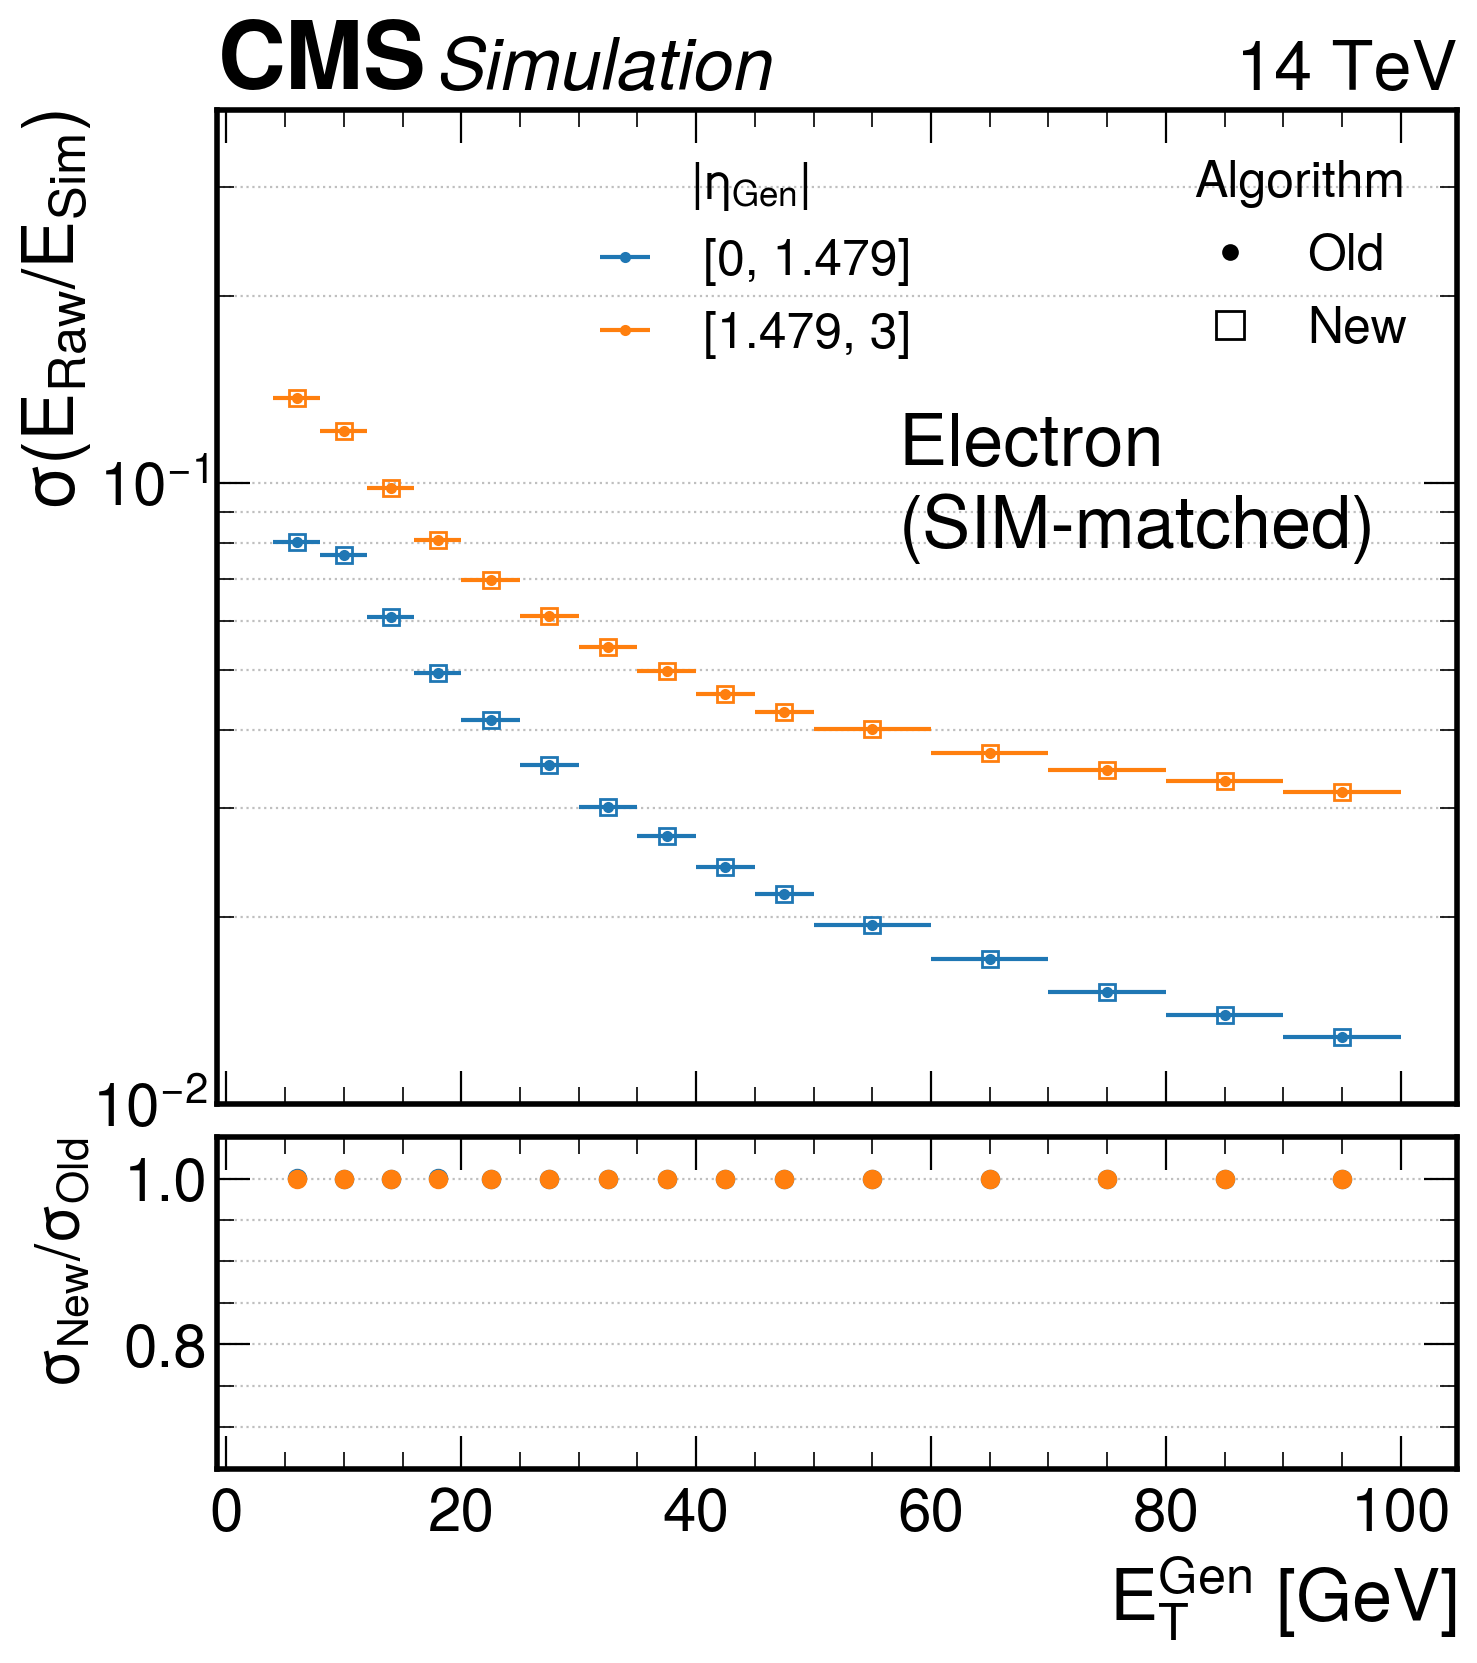

In [28]:
ets = [4, 8, 12,16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.479, 3]

name = "ele_sim_matched_raw"
flavour = "Electron \n(SIM-matched)"
df = df_join
res_var = "Eraw_ov_Esim"
res_label = "$\sigma (E_{Raw}/E_{Sim})$"

df["et_bin"] = pd.cut(df.calo_et_gen_new, ets, labels=list(range(len(ets)-1)))
# NB SIM ETA
df["eta_bin"] = pd.cut(df.calo_simeta_new.abs(), etas, labels=list(range(len(etas)-1)))

# Eta restrinction
etaEB, etaEE = 1.485, 1.566
res = df_join.groupby(["et_bin","eta_bin"]).apply(bin_analysis(f"{res_var}_new"))
res_must = df_join.groupby(["et_bin","eta_bin"]).apply(bin_analysis(f"{res_var}_old"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel(res_label)

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.65, 1.05)
axs[1].set_ylabel("$\sigma_{New}/\sigma_{Old}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.56, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Old')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='New')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(name))

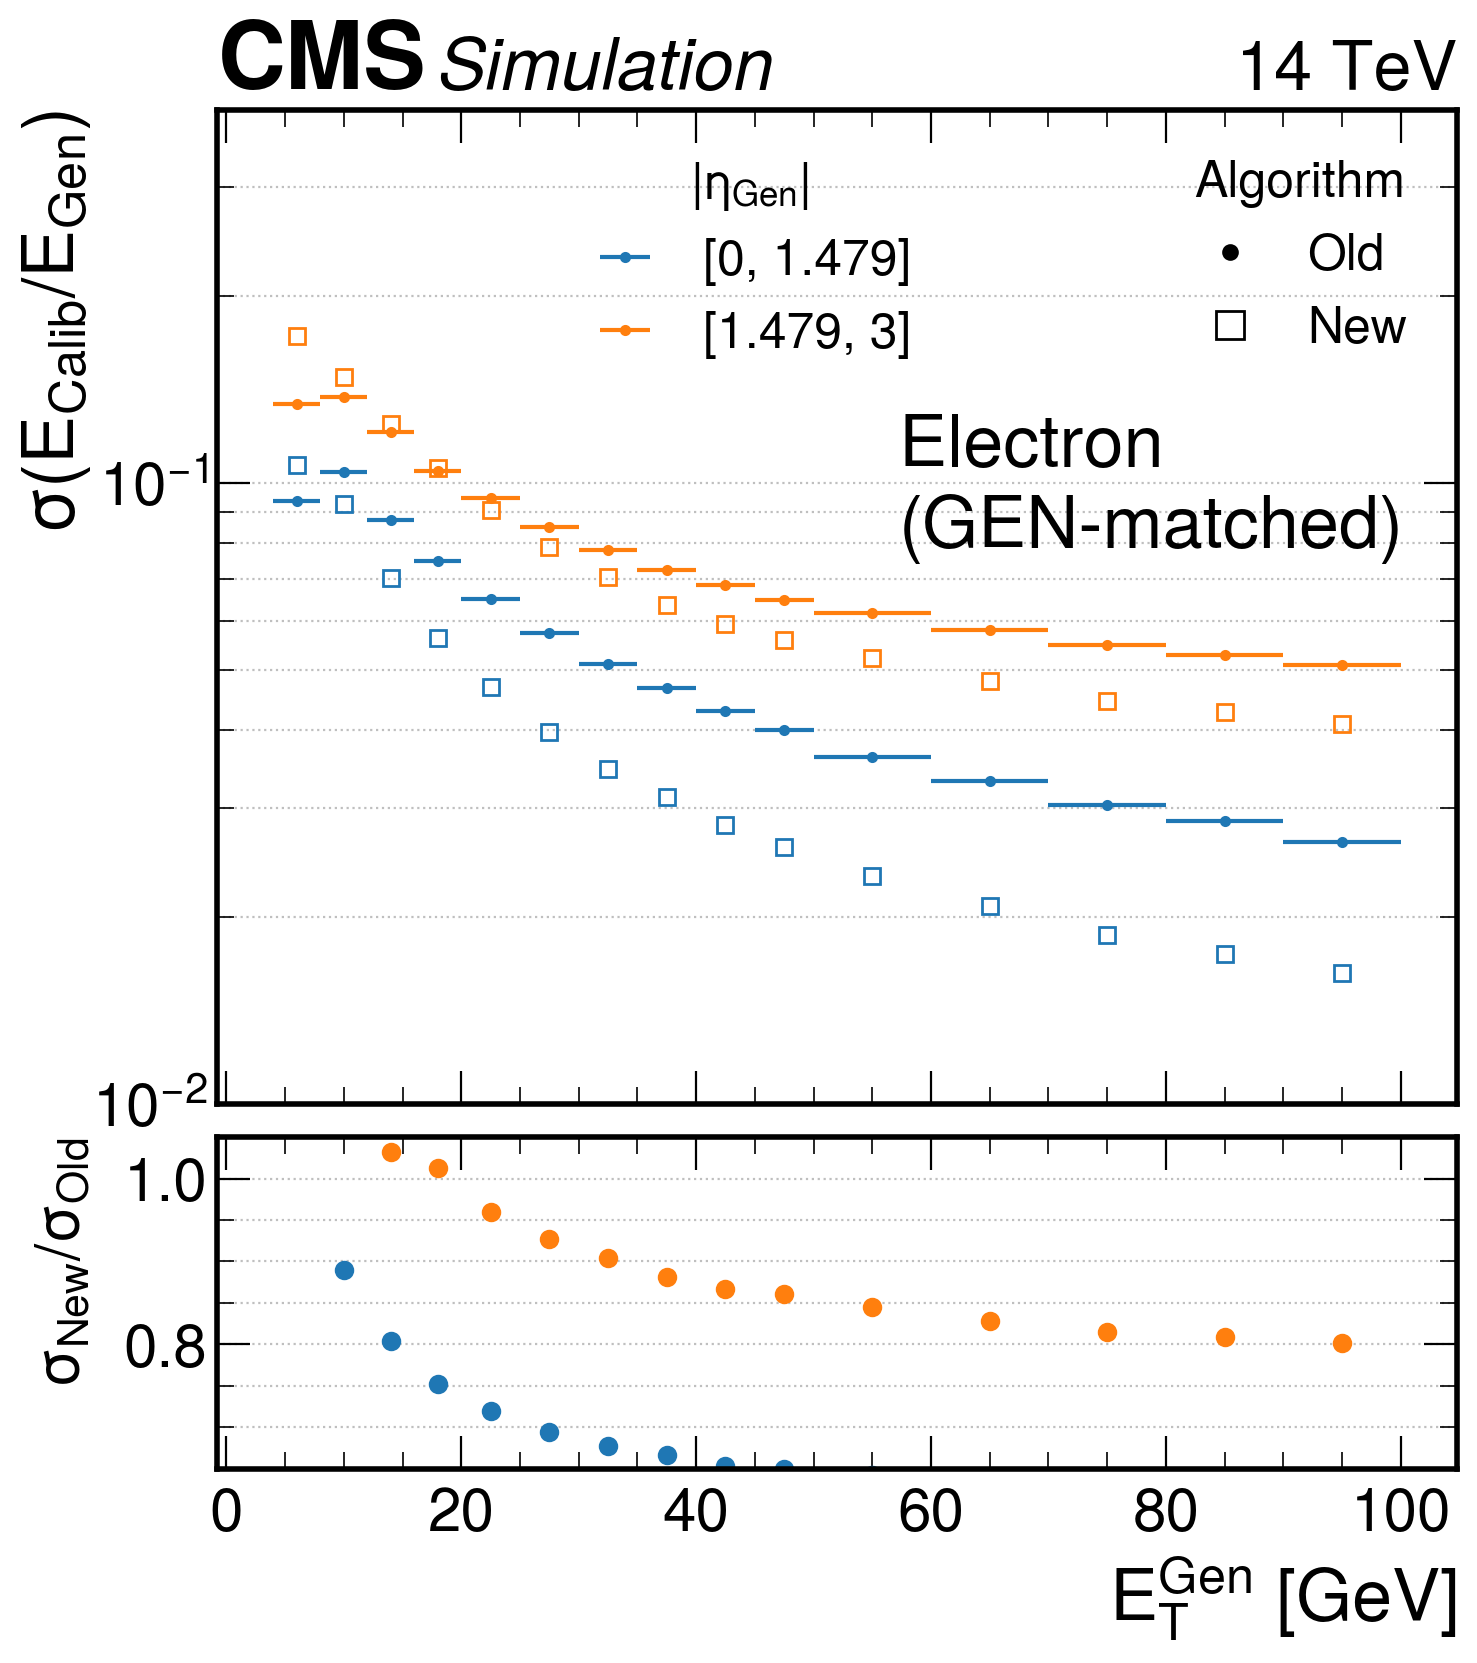

In [31]:
ets = [4, 8, 12,16, 20,25 ,30,35,40, 45, 50, 60, 70, 80, 90 ,100]
etas = [0, 1.479, 3]

name = "ele_gen_matched_corr"
flavour = "Electron \n(GEN-matched)"
df = df_join
res_var = "Ecorr_ov_EGen"
res_label = "$\sigma (E_{Calib}/E_{Gen})$"

df["et_bin"] = pd.cut(df.calo_et_gen_new, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.seed_eta_new.abs(), etas, labels=list(range(len(etas)-1)))

# Eta restrinction
etaEB, etaEE = 1.485, 1.566
res = df_join.groupby(["et_bin","eta_bin"]).apply(bin_analysis(f"{res_var}_new"))
res_must = df_join.groupby(["et_bin","eta_bin"]).apply(bin_analysis(f"{res_var}_old"))
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)

#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(ets)-1):
    errx.append((ets[i+1]- ets[i])/2)
    x.append((ets[i+1]+ ets[i])/2)

mustl = []
deepl = []



for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res_must[res_must.eta_bin == ieta].w68, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt = ".")
    mustl.append(l)

for ieta, eta in enumerate(etas[:-1]):
    l = axs[0].errorbar(x, res[res.eta_bin == ieta].w68, xerr=errx,label="[{}, {}]".format(etas[ieta], etas[ieta+1]), 
                            marker="s", markerfacecolor='none', c=mustl[ieta].lines[0].get_color(), linestyle='none', elinewidth=0)
    deepl.append(l)


for ieta, eta in enumerate(etas[:-1]):
#         v =res_must[res_must.eta_bin == ieta].w68**2 - res[res.eta_bin == ieta].w68**2
#         var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.eta_bin == ieta].w68
    var = res[res.eta_bin == ieta].w68 / res_must[res_must.eta_bin == ieta].w68
    axs[1].errorbar(x, var, xerr=errx, label="[{}, {}]".format(etas[ieta], etas[ieta+1]), fmt="o", linestyle='none', elinewidth=0 )

axs[0].set_ylabel(res_label)

axs[1].set_xlabel("$E_T^{Gen}$ [GeV]")
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")
axs[0].set_ylim(1e-2, 0.4)
axs[1].set_ylim(0.65, 1.05)
axs[1].set_ylabel("$\sigma_{New}/\sigma_{Old}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)
#     axs[1].legend(ncol=2, loc="upper right", fontsize=15)

axs[0].text(0.55, 0.56, flavour, transform=axs[0].transAxes)
axs[0].set_yscale("log")

l1= axs[0].legend(handles=mustl, title="$|\eta_{Gen}|$", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.6, 1), fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Old')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='New')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", fontsize=18)
axs[0].add_artist(l1)
axs[1].grid(axis="y",which="both")
axs[0].grid(axis="y", which="both")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byEnergy_{}_ratio.svg".format(name))

# Resolution by Eta

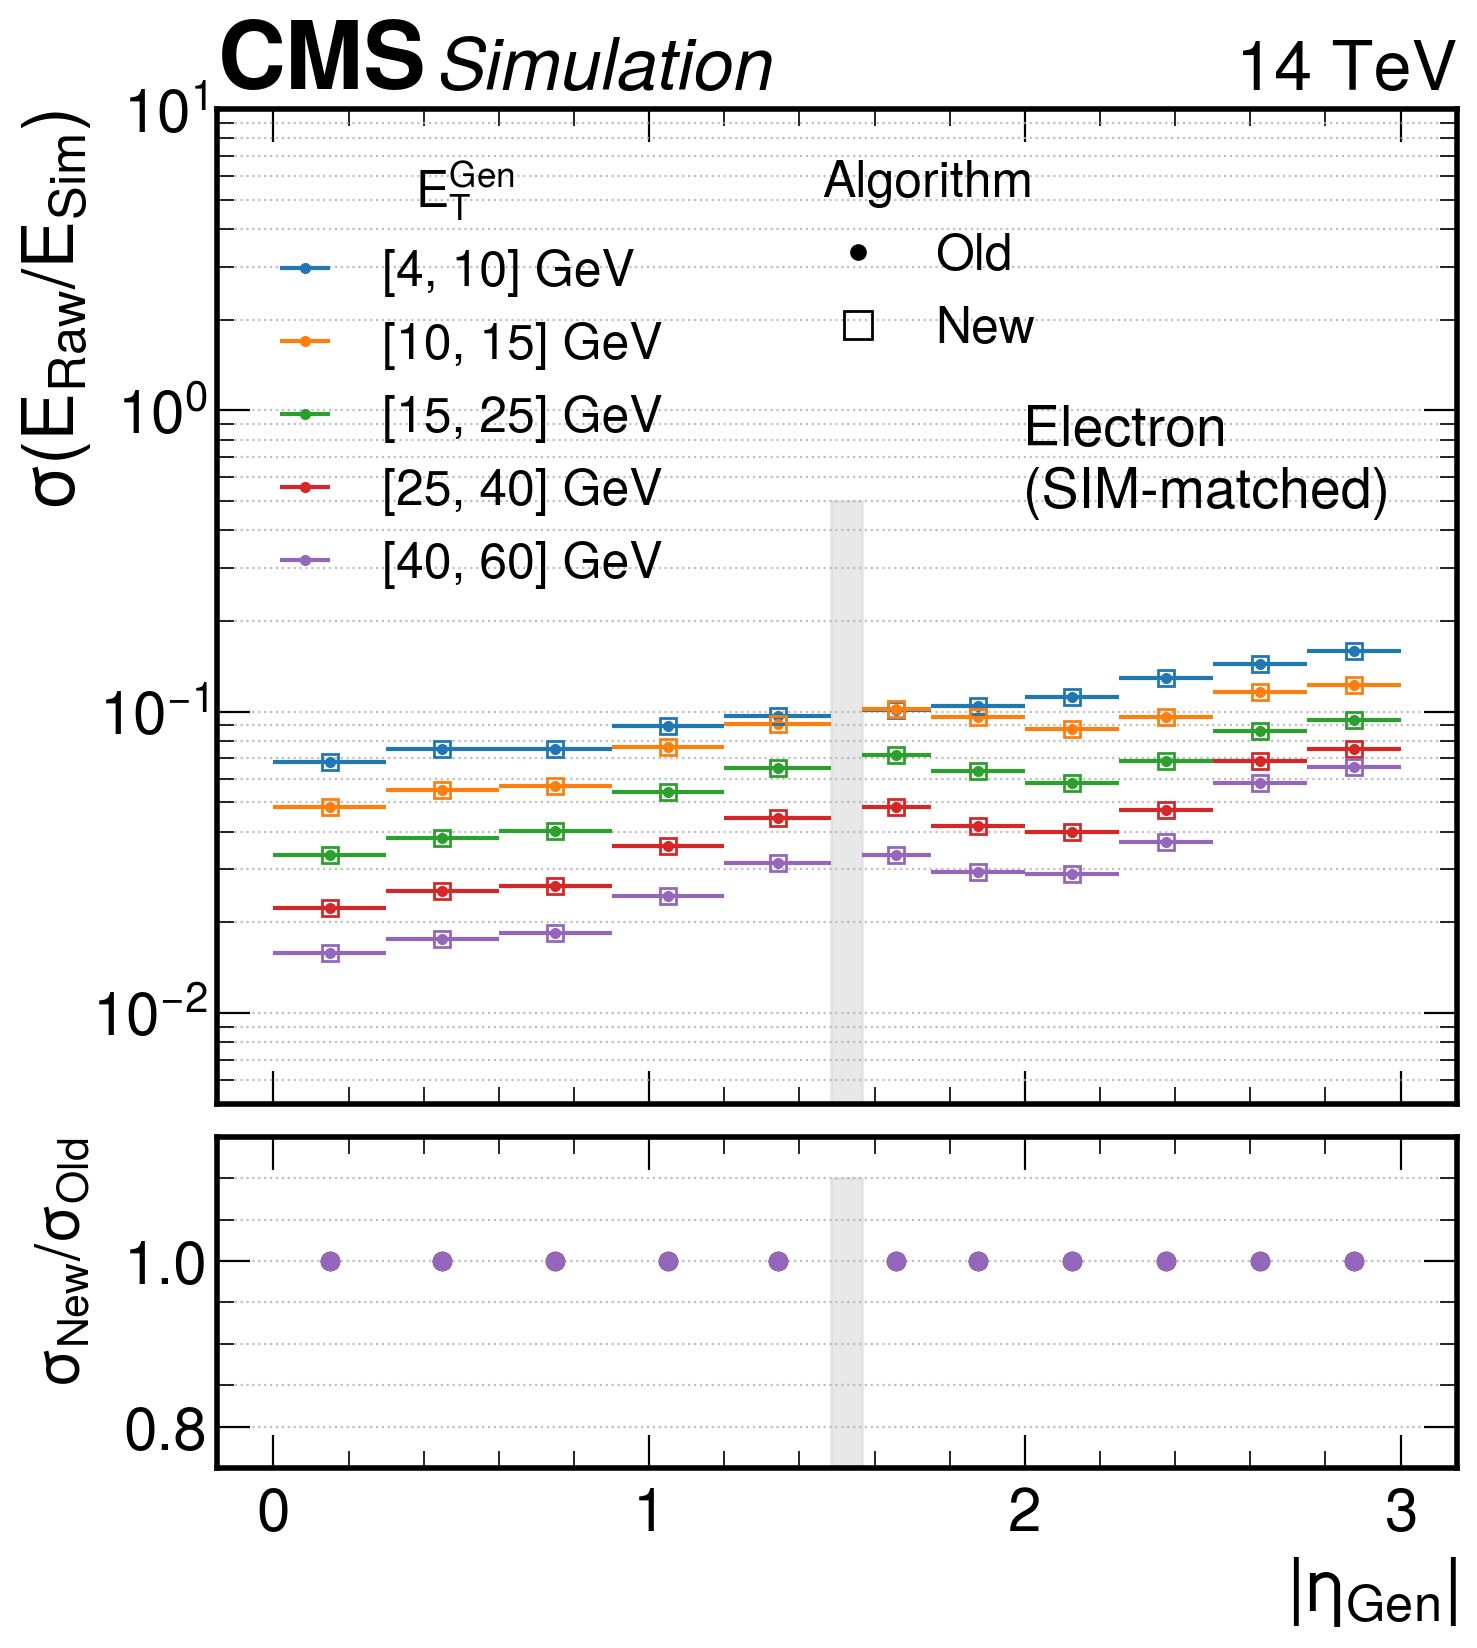

In [30]:
ets = [4,10,15, 25, 40,60]
iplot = [0, 1, 2, 3,4 ]
etas = [0, 0.3,0.6,0.9,1.2, 1.485, 1.566, 1.75, 2.,2.25,2.5,2.75,3]
exclude_bin = 5

name = "ele_sim_matched_raw"
flavour = "Electron \n(SIM-matched)"
df = df_join
res_var = "Eraw_ov_Esim"
res_label = "$\sigma (E_{Raw}/E_{Sim})$"

df["et_bin"] = pd.cut(df.calo_et_gen_new, ets, labels=list(range(len(ets)-1)))
df["eta_bin"] = pd.cut(df.seed_eta_new.abs(), etas, labels=list(range(len(etas)-1)))


res = df_join.groupby(["et_bin","eta_bin"]).apply(bin_analysis(f"{res_var}_new"))
res_must = df_join.groupby(["et_bin","eta_bin"]).apply(bin_analysis(f"{res_var}_old"))
#     avgenraw = df.groupby(["et_bin","eta_bin"]).agg({"en_true_sim_good": "mean"})
res.reset_index(level=0, inplace=True)
res.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
res_must.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)
#     avgenraw.reset_index(level=0, inplace=True)

fig = plt.figure(figsize=(8,9), dpi=200)
gs = fig.add_gridspec(2, hspace=0.05, height_ratios=[0.75,0.25])
axs = gs.subplots(sharex=True)

errx = []
x = []
for i in range(len(etas)-1):
    errx.append((etas[i+1]- etas[i])/2)
    x.append((etas[i+1]+ etas[i])/2)

mustl = []
deepl = []

res.loc[res.eta_bin == exclude_bin, ["w68"]] = 0
res_must.loc[res_must.eta_bin == exclude_bin, ["w68"]] = 0

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res_must[res_must.et_bin == iet].w68, xerr=errx, label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), fmt = ".")
    mustl.append(l)

i = 0
for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    l = axs[0].errorbar(x, res[res.et_bin == iet].w68,  xerr=errx ,label="[{}, {}] GeV".format(ets[iet], ets[iet+1]), 
                            c=mustl[i].lines[0].get_color(), marker="s", markerfacecolor='none', linestyle='none',elinewidth=0)
    i+=1
    deepl.append(l)

axs[0].fill_between([1.485, 1.566], [5e-3,5e-3],[0.5,0.5], color="lightgray", alpha=0.5)

for iet, et in enumerate(ets[:-1]):
    if iet not in iplot: continue
    #v =res_must[res_must.et_bin == iet].w68**2 - res[res.et_bin == iet].w68**2
    #var = np.sqrt(np.abs(v))*np.sign(v) / res_must[res_must.et_bin == iet].w68
    var = res[res.et_bin==iet].w68 / res_must[res_must.et_bin==iet].w68
    axs[1].errorbar(x, var,xerr=errx, label="$E_T^{Gen} $" + " [{}, {}] GeV".format(ets[iet], ets[iet+1]),  fmt="o", linestyle='none', elinewidth=0)

axs[0].set_ylabel(res_label)

l1= axs[0].legend(handles=mustl, title="$E_T^{Gen}$", title_fontsize=18, loc="upper left", fontsize=18)

ml = mlines.Line2D([], [], color='black', marker='.', linestyle='None', markersize=10, label='Old')
dl = mlines.Line2D([], [], color='black', marker='s', markerfacecolor='none', linestyle='None', markersize=10, label='New')
axs[0].legend(handles=[ml,dl], title="Algorithm", title_fontsize=18, loc="upper right", bbox_to_anchor=(0.7, 1), fontsize=18)
axs[0].add_artist(l1)

axs[1].set_xlabel("$|\eta_{Gen}|$")
axs[0].set_ylim(5e-3,1e1)
# ax.plot([0,100],[1,1], linestyle="dashed", color="black")

axs[1].set_ylim(0.75, 1.15)
axs[1].set_ylabel("$\sigma_{New}/\sigma_{Old}$", fontsize=22)
axs[0].get_yaxis().set_label_coords(-0.1,1)
axs[1].get_yaxis().set_label_coords(-0.1,1)

axs[1].fill_between([1.485, 1.566], [-0.1,-0.1],[1.1,1.1], color="lightgray", alpha=0.5)

#     axs[1].legend(ncol=3,prop={'size': 13}, loc="lower left" )

axs[0].text(0.65, 0.6, flavour, transform=axs[0].transAxes, fontsize=20)

axs[0].set_yscale("log")
axs[0].grid(which="both",axis="y")
axs[1].grid(which="both",axis="y")

hep.cms.label(rlabel="14 TeV", loc=0, ax=axs[0])

fig.savefig(output_folder + "/resolution_byeta_{}_ratio.png".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.pdf".format(name))
fig.savefig(output_folder + "/resolution_byeta_{}_ratio.svg".format(name))
